# Housing Prices Predictions Report

# Problem

The project addresses the problem of analyzing and predicting housing prices using real-estate attributes collected from residential properties.

The main aims are:


*   To classify houses into price categories (e.g., Extremely Low, Low, Medium, High, Extremely High) based on their structural and locational features.
*   To discover natural groupings (clusters) of houses that share similar characteristics, in order to better understand market segments and patterns in the housing market.


*   To provide a data-driven view that can support pricing decisions and market analysis by examining how factors such as area, number of rooms, parking, and furnishing status are related to price.









# Data Mining Task

Two main data mining tasks are implemented:

**Classification Task** (Supervised Learning)

**Goal**: Predict the price category of a house (target variable) from its features.

**Technique used**: Decision Tree Classifier (with both Gini index and Information Gain / Entropy as splitting criteria).

**Output**: A predictive model that assigns each property to one of five ordered price categories based on its attributes.




---


**Clustering Task** (Unsupervised Learning)

**Goal**: Group houses into homogeneous clusters based only on their features (without using the price category), to explore natural segments of the housing market.

**Technique used:** K-means clustering, tested with different values of K (K = 2, 3, 4 and also a wider range for Elbow and Silhouette analysis).

**Output:** Clusters of houses characterised by different levels of size, structure and price; evaluation is done using Within-Cluster Sum of Squares (inertia/WCSS) and Silhouette score.

Both tasks are applied to the same preprocessed dataset, which allows later comparison between classification and clustering behaviour.

# Data

**Source of the Dataset**


The dataset was sourced from the kaggle website in this URL:

https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction



## Read dataset:

In [ ]:
import pandas as pd
df = pd.read_csv("Raw_dataset.csv")

## General Information:

• Type of Attributes: Numeric, Symmetric Binary, Ordinal.

In [ ]:
# 1.data types of attributes (features)
print("Attributes type: ")
df.info()

Attributes type: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB




### Number of attributes:



In [ ]:
# 2. Number  of attributes
print("Number of attributes: " + str(len(df.columns)))

Number of attributes: 13


In [ ]:
df.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

**Attributes and Size**

The original attributes are:

| **Name**  | **Type**  | **Description** |
| --------- | --------- | --------------- |
| **price** | **numerical** | **house price (later converted to price_category)**   |
| **area**  | **numerical**   | **Size of the house in square feet**   |
| **bedrooms**  | **numerical**    | **number of bedrooms (1–6)**   |
| **bathrooms**  | **numerical**     | **number of bathrooms (1–4)**    |
| **stories**  | **numerical**     | **number of stories (1–4)**   |
| **mainroad**  | **categorical**    | **whether the house is located on a main road (yes or No)**   |
| **guestroom**  | **categorical**     | **(yes/no)**   |
| **basement**  | **categorical**     | **(yes/no)**    |
| **hotwaterheating**  | **categorical**     | **(yes/no)**    |
| **airconditioning**  | **categorical**     | **(yes/no)**    |
| **parking**  | **numerical**     | **(0–3), number of parking spaces**   |
| **prefarea**  | **categorical**     |**(yes/no), preferred area**   |
| **urnishingstatus**  | **categorical**     | **(furnished, semi-furnished, unfurnished)**    |




**An additional derived attribute is created:**


we added class label derived by discretizing price into five ordered bins using pd.cut


| **Name**  | **Type**  | **Description** |
| --------- | --------- | --------------- |
| **price_category** | **categorical** | **"Extremely Low", "Low", "Medium", "High", "Extremely High"**   |


Class distribution:


1.   Extremely Low: 229 instances.
2.   Low: 223 instances.


1.   Medium: 72 instances.

1.   High: 16 instances.
2.   Extremely High: 5 instances.

This distribution shows strong class imbalance, with most observations in the Extremely Low and Low categories and very few in the High and Extremely High categories.


###  Number of objects:

In [ ]:
# 3. Number of objects (instances/records)
print("Number of objects: " + str(len(df)))

Number of objects: 545


### Class attribtute:


In [ ]:
import pandas as pd

# Transform 'price' into categorical class labels (from low to high)
df["price_category"] = pd.cut(
    df["price"],
    bins=5,
    labels=["Extremely Low", "Low", "Medium", "High", "Extremely High"]
)

# Display the class attribute with its values and count of instances for each label
print("\nClass Attribute (price): Predicting how the prices of various properties will change by examining their different features.")
print(df["price_category"].value_counts())


Class Attribute (price): Predicting how the prices of various properties will change by examining their different features.
price_category
Extremely Low     229
Low               223
Medium             72
High               16
Extremely High      5
Name: count, dtype: int64


### sample of the raw data:



In [ ]:
#5. Print a sample of the raw dataset
print("\nSample of the raw dataset:")
display(df.head())


Sample of the raw dataset:


price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

   price_category  
0  Extremely High  
1  Extremely High  
2  Extremely High  
3  Extremely High  
4  Extremely High

## Summary of data:

In [ ]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

By analyzing the statistical measures of the dataset's attributes, we gathered the following insights:

• The price of houses ranges from 1,750,000 to 13,300,000, with a median of 4,340,000. This indicates a skew towards higher prices, as the 3rd quartile is much closer to the median than the maximum value, suggesting potential outliers at the higher end.

• The area of the houses ranges from 1,650 to 16,200 square feet, with a median of 4,600 square feet. This suggests that there are more larger houses compared to smaller ones in the dataset.

• The number of bedrooms ranges from 1 to 6, with a median of 3 and a 3rd quartile of 3, this implies that most houses have 3 or fewer bedrooms, with fewer homes having more than that.

• The number of bathrooms ranges from 1 to 4 bathrooms per house, with a median of 1, indicating that most homes have just one bathroom.

• The number of stories ranges from 1 to 4 stories, with a median of 2 and a 3rd quartile of 2, meaning that the majority of homes have two or fewer stories.

• The number of parkings ranges from 0 to 3, with a median of 0 and a 3rd quartile of 0. This suggests that most houses in the dataset likely do not have parking facilities.

Variance: indicates how dispersion and spread of values.Therefore, our variance results indicate:

price have high variance, so the level of dispersion and spread of values is high.

stories have low variance, so the level of dispersion and spread of values is low.

## First 5 Rows of the Dataset:

In [ ]:
print(" First 5 Rows of the Dataset:")
display(df.head())

 First 5 Rows of the Dataset:


price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

   price_category  
0  Extremely High  
1  Extremely High  
2  Extremely High  
3  Extremely High  
4  Extremely High

## data info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    object  
 6   guestroom         545 non-null    object  
 7   basement          545 non-null    object  
 8   hotwaterheating   545 non-null    object  
 9   airconditioning   545 non-null    object  
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    object  
 12  furnishingstatus  545 non-null    object  
 13  price_category    545 non-null    category
dtypes: category(1), int64(6), object(7)
memory usage: 56.2+ KB


## Numerical Summary:

In [ ]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

By analyzing the statistical measures of the dataset's attributes, we gathered the following insights:

• The price of houses ranges from 1,750,000 to 13,300,000, with a median of 4,340,000. This indicates a skew towards higher prices, as the 3rd quartile is much closer to the median than the maximum value, suggesting potential outliers at the higher end.

• The area of the houses ranges from 1,650 to 16,200 square feet, with a median of 4,600 square feet. This suggests that there are more larger houses compared to smaller ones in the dataset.

• The number of bedrooms ranges from 1 to 6, with a median of 3 and a 3rd quartile of 3, this implies that most houses have 3 or fewer bedrooms, with fewer homes having more than that.

• The number of bathrooms ranges from 1 to 4 bathrooms per house, with a median of 1, indicating that most homes have just one bathroom.

• The number of stories ranges from 1 to 4 stories, with a median of 2 and a 3rd quartile of 2, meaning that the majority of homes have two or fewer stories.

• The number of parkings ranges from 0 to 3, with a median of 0 and a 3rd quartile of 0. This suggests that most houses in the dataset likely do not have parking facilities.

Variance: indicates how dispersion and spread of values.Therefore, our variance results indicate:

price have high variance, so the level of dispersion and spread of values is high.

stories have low variance, so the level of dispersion and spread of values is low.

In [ ]:
df.var(numeric_only=True)

price        3.498544e+12
area         4.709512e+06
bedrooms     5.447383e-01
bathrooms    2.524757e-01
stories      7.525432e-01
parking      7.423300e-01
dtype: float64

## Categorical Summary:


In [ ]:
df.describe(include=[object])

mainroad guestroom basement hotwaterheating airconditioning prefarea  \
count       545       545      545             545             545      545   
unique        2         2        2               2               2        2   
top         yes        no       no              no              no       no   
freq        468       448      354             520             373      417   

       furnishingstatus  
count               545  
unique                3  
top      semi-furnished  
freq                227

By analyzing dataset's Categorical attributes, we gathered the following insights:

• mainroad: The majority of the houses in this dataset are located on a main road, with 468 out of 545 properties having this feature. This shows that being near a main road is common in this dataset, likely offering convenience and accessibility.

• guestroom: Most houses do not have a guestroom, as 448 properties show no for this feature. This might suggest that having a guestroom is considered more of a luxury or less common in this set of houses.

• basement: Basements are also less common, with only 354 properties lacking one. This could be influenced by regional preferences or property type.

• hotwaterheating: The vast majority of homes do not have hot water heating, with 520 properties showing no. This suggests that either the homes use alternative heating methods or that hot water heating is less of a priority in this dataset.

• airconditioning: Air conditioning isn't widely present, with 373 homes not having it. This might reflect the climate of the area or the age of the properties, where air conditioning isn't a standard feature.

• prefarea: Only 128 homes are located in a preferred area, as most 417 homes are not. This could suggest a broader variety of locations and property types, with the majority not being classified as premium locations.

• furnishingstatus: Furnishing is a mix, but the most common option is semi-furnished, with 227 homes in this category. This could appeal to buyers looking for flexibility between a fully furnished home and an empty one.

## Missing Values Analysis


In [ ]:
print("\n Missing Values Count per Column:")
print(df.isnull().sum())


 Missing Values Count per Column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price_category      0
dtype: int64


there are no missing values

## Five-Number Summary

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
print(f"\nFive-number summary for:")
for col in numeric_cols:

    print(f"\n{col}: Min:", df[col].min(),", Q1:", df[col].quantile(0.25),", Median:", df[col].median(),", Q3:", df[col].quantile(0.75),", Max:", df[col].max())



Five-number summary for:

price: Min: 1750000 , Q1: 3430000.0 , Median: 4340000.0 , Q3: 5740000.0 , Max: 13300000

area: Min: 1650 , Q1: 3600.0 , Median: 4600.0 , Q3: 6360.0 , Max: 16200

bedrooms: Min: 1 , Q1: 2.0 , Median: 3.0 , Q3: 3.0 , Max: 6

bathrooms: Min: 1 , Q1: 1.0 , Median: 1.0 , Q3: 2.0 , Max: 4

stories: Min: 1 , Q1: 1.0 , Median: 2.0 , Q3: 2.0 , Max: 4

parking: Min: 0 , Q1: 0.0 , Median: 0.0 , Q3: 1.0 , Max: 3


The data shows wide variability in price (1.75M–13.3M, median 4.34M) and area (1,650–16,200, median 4,600), with several high-value outliers.

Other features are more compact: bedrooms (1–6, median 3), bathrooms (1–4, median 2), stories (1–4, median 2), and parking (0–3, median 0).

## Mean & Standard Deviation

In [ ]:
print("\nMean of numeric attributes:")
print(df[numeric_cols].mean())

print("\nStandard Deviation of numeric attributes:")
print(df[numeric_cols].std())


Mean of numeric attributes:
price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

Standard Deviation of numeric attributes:
price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64


The high Standard Deviation of price (1.87M) and area (2,170) indicates strong dispersion, meaning outliers and luxury properties can heavily affect predictions. In contrast, smaller Standard Deviation values for bedrooms, bathrooms, and stories show these features are more consistent, making them reliable predictors.

# Understanding the data through graph representations:

## Boxplot Analysis (Outliers)

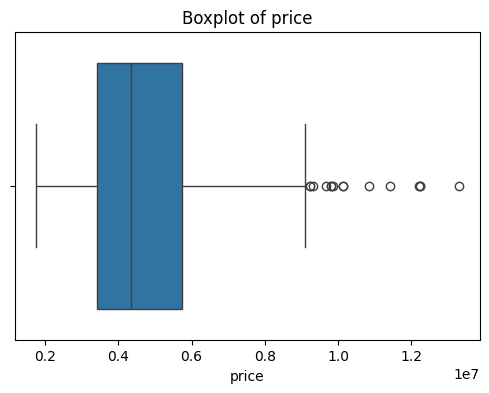

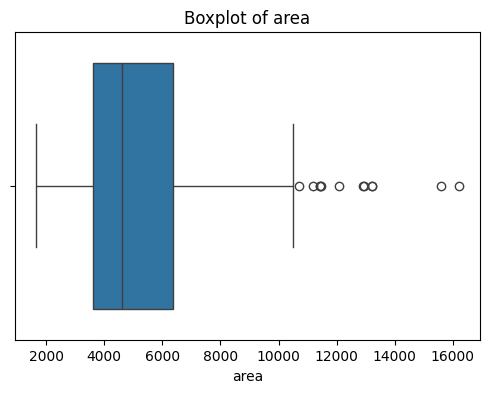

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x=df["price"])
plt.title(f"Boxplot of price")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df["area"])
plt.title(f"Boxplot of area")
plt.show()

Price: The boxplot reveals several outliers on the higher end, where some properties exceed 8M. These values are far above the bulk of the data and represent luxury homes.

Area: Outliers are also observed beyond 10,000 sq. units, showing unusually large properties compared to the majority.

Impact of Outliers:

Outliers in price and area inflate the mean and create skewness in the data. While the median remains a stable measure of central tendency, models that rely on the mean could be biased by these extreme values. Identifying and handling these outliers is important before moving to preprocessing and modeling.

# Histogram

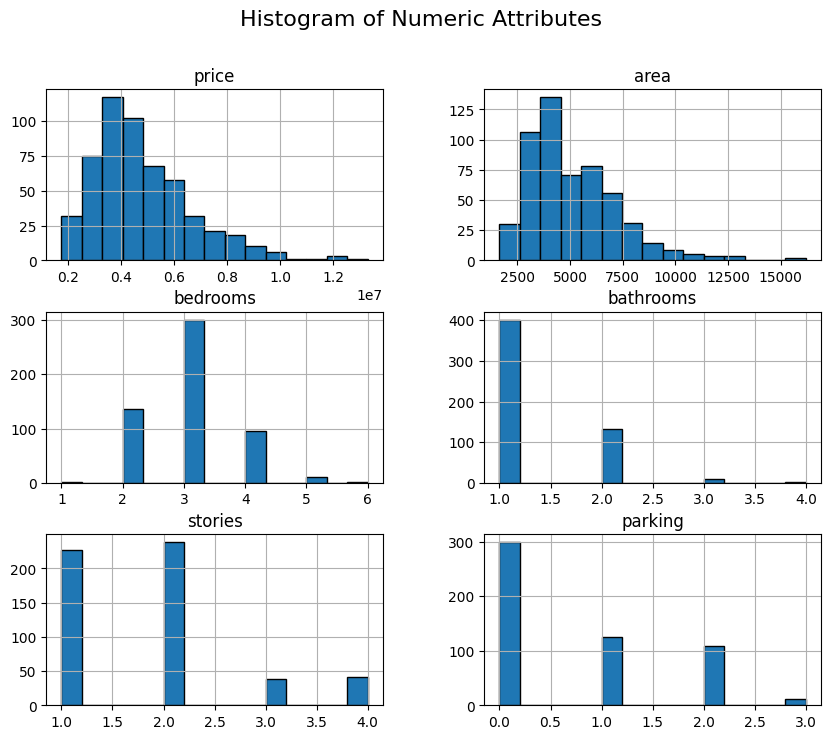

In [ ]:
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df[numeric_cols].hist(figsize=(10,8), bins=15, edgecolor='black')
plt.suptitle("Histogram of Numeric Attributes", fontsize=16)
plt.show()

The histogram illustrates the distribution of all numerical attributes in the dataset, including price, area, bedrooms, bathrooms, stories, and parking. It provides an overview of how the data values are spread across different ranges. From the plots, it is evident that most houses fall within the lower to middle price and area ranges, with relatively few houses that are extremely large or highly priced. Similarly, other features such as the number of bedrooms, bathrooms, and parking spaces display uneven distributions, where certain values occur much more frequently than others. This observation indicates that the dataset is skewed and lacks uniformity in value distribution. Such imbalance suggests the need for data preprocessing techniques, such as normalization or transformation, to ensure that each numerical feature contributes fairly to the predictive model.



## Scatter Plot

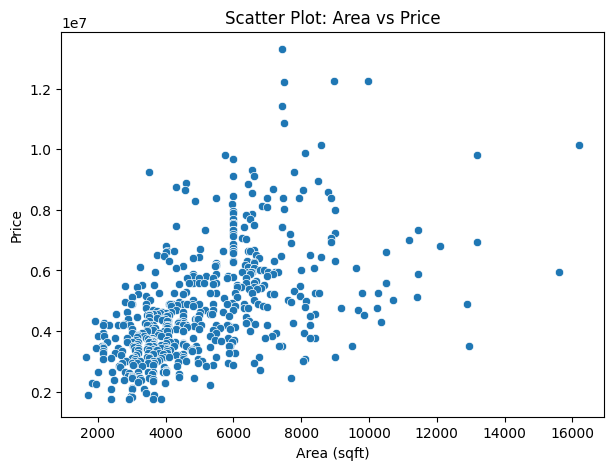

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='area', y='price')
plt.title('Scatter Plot: Area vs Price')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.show()

The scatter plot displays the relationship between two key numerical variables: the total area of the house and its price. The points form an upward trend, indicating a positive correlation between these attributes as the area increases, the price tends to rise as well. However, the plot also reveals the presence of outliers, where certain houses have unusually high or low prices compared to their area. These inconsistencies may result from missing contextual factors or noise in the dataset. Understanding this relationship helps identify the influence of property size on pricing.



## Bar Plot

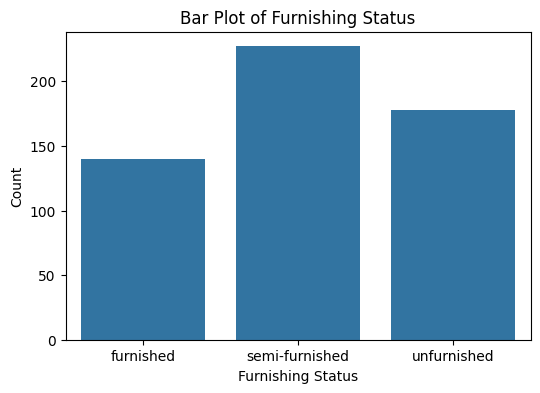

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='furnishingstatus')
plt.title('Bar Plot of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

The bar plot illustrates the distribution of houses across different furnishing statuses: fully furnished, semi-furnished, and unfurnished. It is evident that semi-furnished houses represent the largest portion of the dataset, followed by unfurnished and then fully furnished houses. This uneven distribution reveals that the dataset is not balanced in terms of categorical representation. Such imbalance is important to recognize before modeling, as it may bias the model’s predictions toward the most frequent category.

## Class Label Distribution (Bar plot)


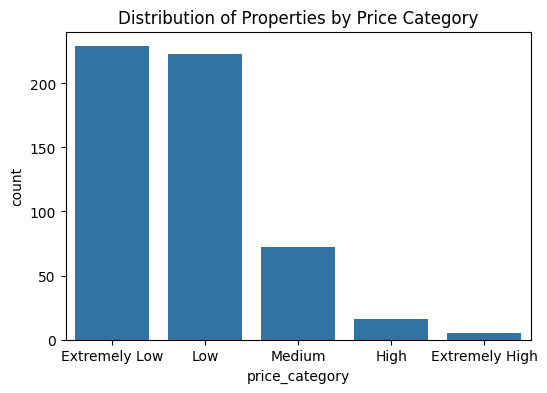

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["price_category"])
plt.title("Distribution of Properties by Price Category")
plt.show()

The count plot shows that the majority of properties fall into the Extremely Low and Low price categories, each with more than 220 instances. A smaller portion belongs to the Medium category (around 70 properties), while very few are in the High and Extremely High categories (16 and 5 respectively). This distribution indicates that the dataset is highly skewed towards lower-priced properties, with luxury homes being rare. Such imbalance should be considered in further analysis and modeling, as models may become biased toward the majority classes.

# Data Preprocessing

Preprocessing is carried out to make the data suitable for both Decision Tree classification and K-means clustering. It includes EDA-based transformations, scaling, discretization, encoding, and a theoretical description of the used data mining techniques.

### Variable Transformation (Log Transform)

In [ ]:
import numpy as np

transformed_data = df.copy()

transformed_data['log_price'] = np.log1p(transformed_data['price'])
transformed_data['log_area'] = np.log1p(transformed_data['area'])

print("Before transformation:")
display(df[['price', 'area']].head())

print("\nAfter log transformation:")
display(transformed_data[['log_price', 'log_area']].head())

Before transformation:


price  area
0  13300000  7420
1  12250000  8960
2  12250000  9960
3  12215000  7500
4  11410000  7420


After log transformation:


log_price  log_area
0  16.403275  8.912069
1  16.321037  9.100637
2  16.321037  9.206433
3  16.318175  8.922792
4  16.250001  8.912069

Log transformation was applied to the price and area attributes because both are positive and highly skewed. It was implemented using the np.log1p() function to compress large numeric values and reduce skewness.

This transformation makes the data distribution closer to normal and prevents extreme values from dominating the analysis, improving model stability and interpretability.






### Normalization (Min–Max Scaling)



*   Min–Max scaling is applied to numeric features:
area, bedrooms, bathrooms, stories, parking.
After log transform, scaled versions are: area_scaled, bedrooms_scaled, bathrooms_scaled, stories_scaled, parking_scaled.
*   Implementation:
Using MinMaxScaler() from sklearn.preprocessing.
Each value is linearly rescaled into the range [0, 1].




Purpose:


1.   To ensure that features have comparable scales, especially important for K-means, which is distance-based.
2.   Prevents large-range attributes (e.g., area) from dominating others (e.g., bedrooms).





In [ ]:
from sklearn.preprocessing import MinMaxScaler


numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(transformed_data[numeric_cols])


scaled_df = pd.DataFrame(scaled_values, columns=[col + '_scaled' for col in numeric_cols])


normalized_data = pd.concat([transformed_data, scaled_df], axis=1)


print("Before scaling:")
display(transformed_data[numeric_cols].head())

print("\nAfter Min-Max scaling:")
display(normalized_data[[col + '_scaled' for col in numeric_cols]].head())

Before scaling:


area  bedrooms  bathrooms  stories  parking
0  7420         4          2        3        2
1  8960         4          4        4        3
2  9960         3          2        2        2
3  7500         4          2        2        3
4  7420         4          1        2        2


After Min-Max scaling:


area_scaled  bedrooms_scaled  bathrooms_scaled  stories_scaled  \
0     0.396564              0.6          0.333333        0.666667   
1     0.502405              0.6          1.000000        1.000000   
2     0.571134              0.4          0.333333        0.333333   
3     0.402062              0.6          0.333333        0.333333   
4     0.396564              0.6          0.000000        0.333333   

   parking_scaled  
0        0.666667  
1        1.000000  
2        0.666667  
3        1.000000  
4        0.666667

Normalization was applied to the numeric attributes area, bedrooms, bathrooms, stories, and parking to ensure all features share a uniform scale. The technique was performed using MinMaxScaler(), which rescales each value to a range between 0 and 1.

This improvement helps models and distance-based algorithms treat all features equally, preventing attributes with large numeric ranges from dominating smaller ones, and enhances convergence in later modeling.



### Discretization

area is discretized into three categories using pd.cut on the (scaled) area:
Small, Medium, Large, stored in area_category.

Motivation:


*   Facilitates interpretation of property size groups.
*   Can be used as an additional categorical feature in the Decision Tree model.


*   Helps in understanding how different size categories relate to price levels.

In [ ]:
print("Before discretization (area):")
display(normalized_data[['area']].head(10))

normalized_data['area_category'] = pd.cut(
    normalized_data['area'],
    bins=3,
    labels=['Small', 'Medium', 'Large']
)

print("\nAfter discretization (area_category):")
display(normalized_data[['area', 'area_category']].head(10))

Before discretization (area):


area
0   7420
1   8960
2   9960
3   7500
4   7420
5   7500
6   8580
7  16200
8   8100
9   5750


After discretization (area_category):


area area_category
0   7420        Medium
1   8960        Medium
2   9960        Medium
3   7500        Medium
4   7420        Medium
5   7500        Medium
6   8580        Medium
7  16200         Large
8   8100        Medium
9   5750         Small

Discretization was applied to the area attribute to convert continuous values into categorical size ranges. It was carried out using the pd.cut() function, dividing area values into three bins Small, Medium, and Large.

This technique simplifies the dataset, making it easier to identify patterns and trends across property size categories, and improves interpretability when comparing area with other attributes such as price or furnishing status.

In [ ]:
preprocessed_data = normalized_data[['log_price','log_area',
                                     'area_scaled','bedrooms_scaled',
                                     'bathrooms_scaled','stories_scaled',
                                     'parking_scaled','area_category','price_category']]
preprocessed_data.to_csv('Preprocessed_dataset.csv', index=False)
print(" Preprocessed dataset saved as 'Preprocessed_dataset.csv'")

 Preprocessed dataset saved as 'Preprocessed_dataset.csv'


### Before & After Preprocessing

In [ ]:
print("Snapshot of the Raw Dataset:")
display(df.head())


print("\nSnapshot of the Preprocessed Dataset:")
processed_data = pd.read_csv('Preprocessed_dataset.csv')
display(processed_data.head())

Snapshot of the Raw Dataset:


price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

   price_category  
0  Extremely High  
1  Extremely High  
2  Extremely High  
3  Extremely High  
4  Extremely High


Snapshot of the Preprocessed Dataset:


log_price  log_area  area_scaled  bedrooms_scaled  bathrooms_scaled  \
0  16.403275  8.912069     0.396564              0.6          0.333333   
1  16.321037  9.100637     0.502405              0.6          1.000000   
2  16.321037  9.206433     0.571134              0.4          0.333333   
3  16.318175  8.922792     0.402062              0.6          0.333333   
4  16.250001  8.912069     0.396564              0.6          0.000000   

   stories_scaled  parking_scaled area_category  price_category  
0        0.666667        0.666667        Medium  Extremely High  
1        1.000000        1.000000        Medium  Extremely High  
2        0.333333        0.666667        Medium  Extremely High  
3        0.333333        1.000000        Medium  Extremely High  
4        0.333333        0.666667        Medium  Extremely High

The first table shows the original dataset before applying any preprocessing techniques.
The second table displays the dataset after performing:

Variable Transformation (log transformation on price and area)
Normalization (Min–Max scaling for numeric attributes)
Discretization (converting area into Small, Medium, Large categories)
These preprocessing steps improve data consistency, reduce the impact of extreme values, and prepare the dataset for further data mining and modeling tasks.

## Encodeing

In [ ]:

# Load files
raw = pd.read_csv("Raw_dataset.csv")
prep = pd.read_csv("Preprocessed_dataset.csv")

# --- Rebuild full dataset ---
df = raw.copy()

# Add preprocessed numerical columns
df["log_price"] = prep["log_price"]
df["log_area"] = prep["log_area"]
df["area_scaled"] = prep["area_scaled"]
df["bedrooms_scaled"] = prep["bedrooms_scaled"]
df["bathrooms_scaled"] = prep["bathrooms_scaled"]
df["stories_scaled"] = prep["stories_scaled"]
df["parking_scaled"] = prep["parking_scaled"]
df["area_category"] = prep["area_category"]
df["price_category"] = prep["price_category"]


# ----------------------------
# 1) Encode YES/NO variables
# ----------------------------
binary_cols = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]

for col in binary_cols:
    df[col + "_enc"] = df[col].map({"yes":1, "no":0})

# ----------------------------
# 2) Encode furnishing status
# ----------------------------
furn_map = {
    "unfurnished": 0,
    "semi-furnished": 1,
    "furnished": 2
}
df["furnishing_enc"] = df["furnishingstatus"].map(furn_map)

# ----------------------------
# 3) Encode area_category to numerical
# ----------------------------
area_map = {
    "Small": 0,
    "Medium": 1,
    "Large": 2
}
df["area_category_enc"] = df["area_category"].map(area_map)
# ----------------------------
# 3) Encode price_category to numerical
# ----------------------------
price_map = {
    "Extremely Low": 0,
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Extremely High": 4,

}
df["price_category_enc"] = df["price_category"].map(price_map)


df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  ...  price_category mainroad_enc  \
0              no             yes  ...  Extremely High            1   
1              no             yes  ...  Extremely High            1   
2              no              no  ...  Extremely High            1   
3              no             yes  ...  Extremely High            1   
4              no             yes  ...  Extremely High            1   

  guestroom_enc  basement_enc  hotwaterheating_enc  airconditioning_enc  \
0             0             0                    0                    1   
1             0             0                    0                    1   
2             0             1                    0                    0   
3             0             1                    0                    1   
4             1             1                    0                    1   

   prefarea_enc  furnishing_enc  area_category_enc  price_category_enc  
0             1               2                  1                   4  
1             0               2                  1                   4  
2             1               1                  1                   4  
3             1               2                  1                   4  
4             0               2                  1                   4  

[5 rows x 31 columns]

All non-numerical columns were converted into numerical values using encoding.
Binary attributes (yes/no) were mapped to 1 and 0, and multi-category attributes such as price_category were mapped to ordered numeric levels.
This step is essential to prepare the data for classification, since classification models require numerical input.

## Feature Selection

In [ ]:
features = [
    "log_area",
    "area_scaled",
    "bedrooms_scaled",
    "bathrooms_scaled",
    "stories_scaled",
    "parking_scaled",
    "area_category_enc",
    "mainroad_enc",
    "guestroom_enc",
    "basement_enc",
    "hotwaterheating_enc",
    "airconditioning_enc",
    "prefarea_enc",
    "furnishing_enc"
]

X = df[features]
y = df["price_category"]



A set of numerical and encoded attributes was selected as the input features (X) for the classification model, including scaled values, log-transformed columns, and encoded categorical variables.
The target variable (y) is the encoded price category (price_category_enc).
These selected features allow the model to learn patterns needed for the classification task.

## Best Preprocessing for the Area

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

area_versions = ["log_area", "area_scaled", "area_category_enc"]
results = {}

for area_col in area_versions:
    # This list will exclude all area_versions and include only the current area_col
    current_features = [f for f in features if f not in area_versions] + [area_col]

    X_local = df[current_features]

    X_train, X_test, y_train, y_test = train_test_split(
        X_local, y, test_size=0.3, random_state=42
    )

    model = DecisionTreeClassifier(criterion="gini", random_state=42)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)

    results[area_col] = acc

results

{'log_area': 0.5609756097560976,
 'area_scaled': 0.5609756097560976,
 'area_category_enc': 0.5670731707317073}

### Area Preprocessing Comparison

During preprocessing, three different transformations of the variable area were evaluated to determine which representation provides the best predictive performance in the Decision Tree classifier. The three techniques were:

1-Log Transformation (log_area) – reduces the effect of large values and stabilizes variance.

2-Min–Max Scaling (area_scaled) – normalizes the values into the range 0–1.

3-Discretization (area_category) – converts continuous area values into categorical labels (Small, Medium, Large).

After testing the three versions using the same model and 70/30 split, log_area achieved the highest accuracy, indicating that the log transformation produces a more stable and informative representation for the model. This behavior is expected because the original area variable is right-skewed and contains extreme values, and the log transformation reduces this skewness while preserving relationships between samples. Therefore, log_area was selected as the final preprocessing method for the area attribute.

# Data Mining Technique

**This project applies two major data mining techniques:**

1. Classification using a Decision Tree classifier.
2. Clustering using the K-means algorithm.

These techniques were selected because they align with the goals of the project: predicting price categories (supervised learning), and exploring natural segments in the housing market (unsupervised learning).

## **Classification**

## Confusion matrix:

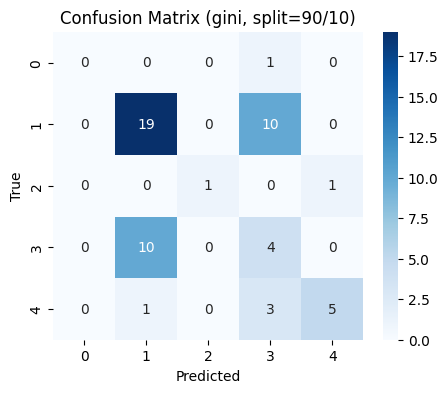

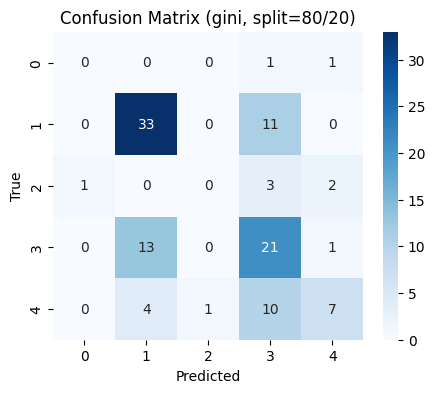

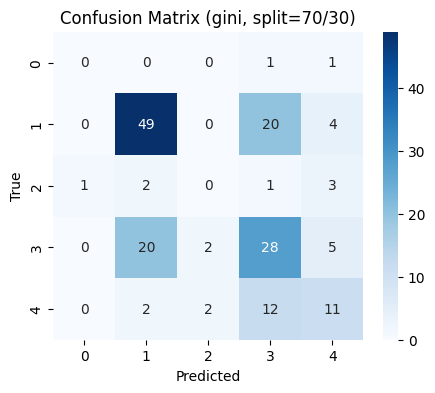

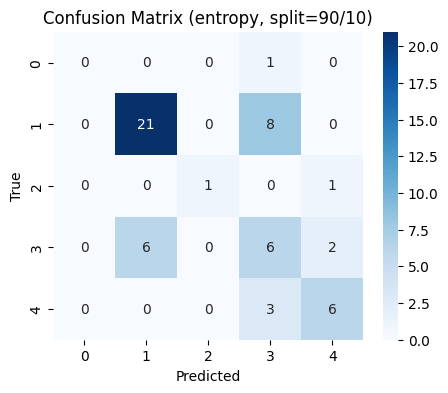

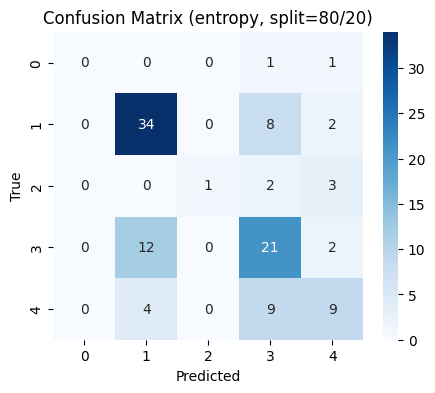

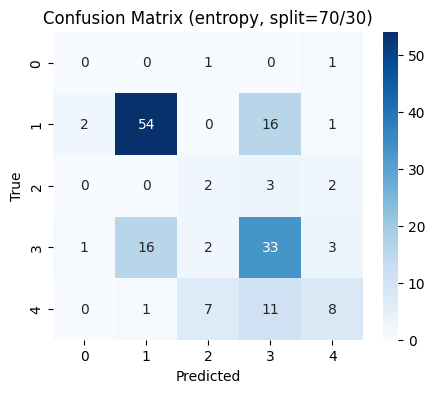

[['gini', 0.1, 0.5272727272727272],
 ['gini', 0.2, 0.5596330275229358],
 ['gini', 0.3, 0.5365853658536586],
 ['entropy', 0.1, 0.6181818181818182],
 ['entropy', 0.2, 0.5963302752293578],
 ['entropy', 0.3, 0.5914634146341463]]

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

splits = [0.1, 0.2, 0.3]
criteria = ["gini", "entropy"]

results_table = []

for crit in criteria:
    for s in splits:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=s, random_state=42)

        model = DecisionTreeClassifier(criterion=crit, random_state=42)
        model.fit(X_train, y_train)

        pred = model.predict(X_test)

        acc = accuracy_score(y_test, pred)

        # Store results
        results_table.append([crit, s, acc])

        # Plot Confusion Matrix
        cm = confusion_matrix(y_test, pred)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix ({crit}, split={int((1-s)*100)}/{int(s*100)})")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

results_table

## **Decision Tree**

Preprocessing:

All numerical features were transformed and scaled (log transform, Min–Max scaling). And Categorical attributes were encoded (0/1 for binary, label encoding for furnishing status).
The target variable was price_category created using pd.cut.

**Training–Testing Splits:**

The model was evaluated under three data splits:

1. 90% train / 10% test
2. 80% train / 20% test
3. 70% train / 30% test

**Criteria Compared**

The classifier was trained using two impurity criteria:
Gini Index
Information Gain (Entropy)

**Model Evaluation**

Accuracy scores were calculated using accuracy_score().
Confusion matrices were generated using confusion_matrix() and visualized with seaborn.heatmap().

**Feature Variants**

The effect of different representations of area was compared:

* log_area
* area_scaled
* area_category

This was done by retraining the Decision Tree with each version and recording results into results_table.

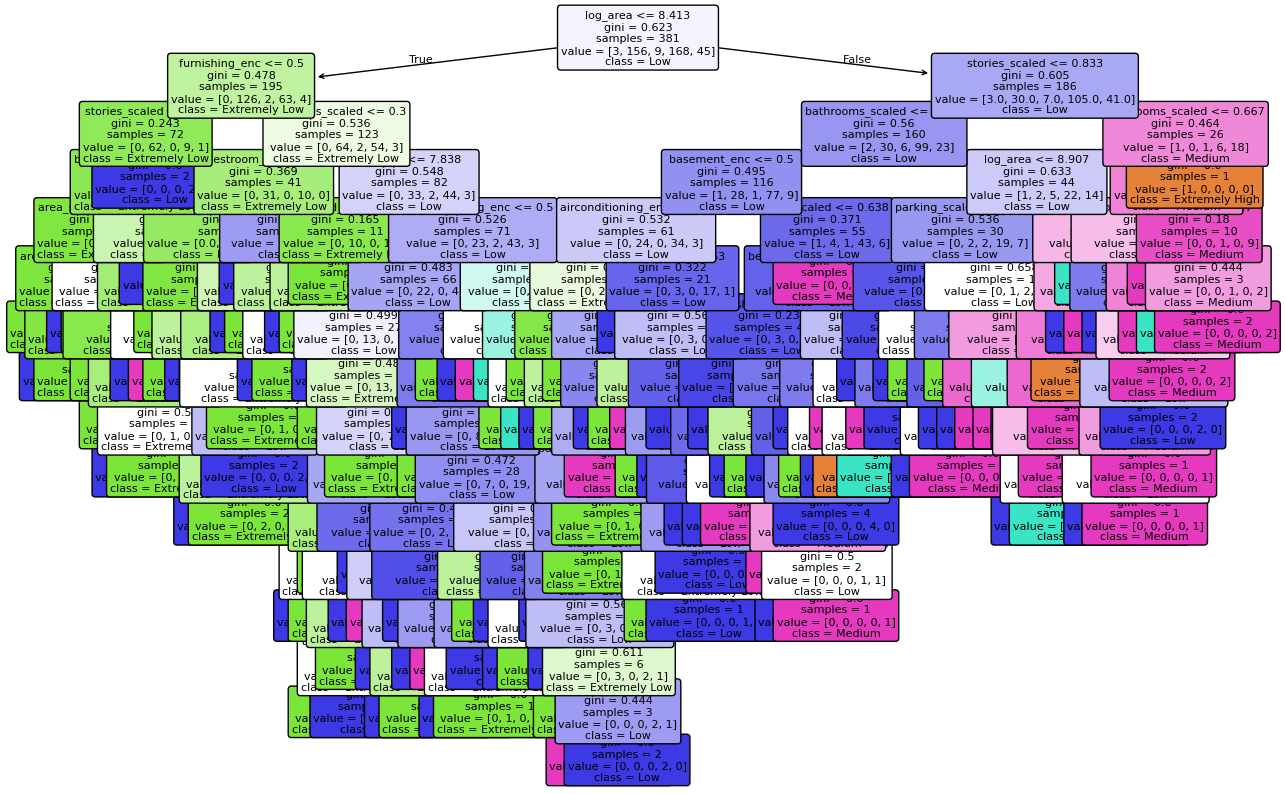

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# train one final model for visualization (for example: Gini, 70/30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

clf_final = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_final.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
tree.plot_tree(
    clf_final,
    feature_names=features,
    class_names=sorted(y.unique().astype(str)),
    filled=True,
    rounded=True,
    fontsize=8
)
plt.show()


The full tree is intentionally large because it grows until reaching pure leaves. For interpretation, we limit the depth only in the visualization tree, ensuring a readable and meaningful representation while keeping the actual model unchanged for accuracy evaluation.



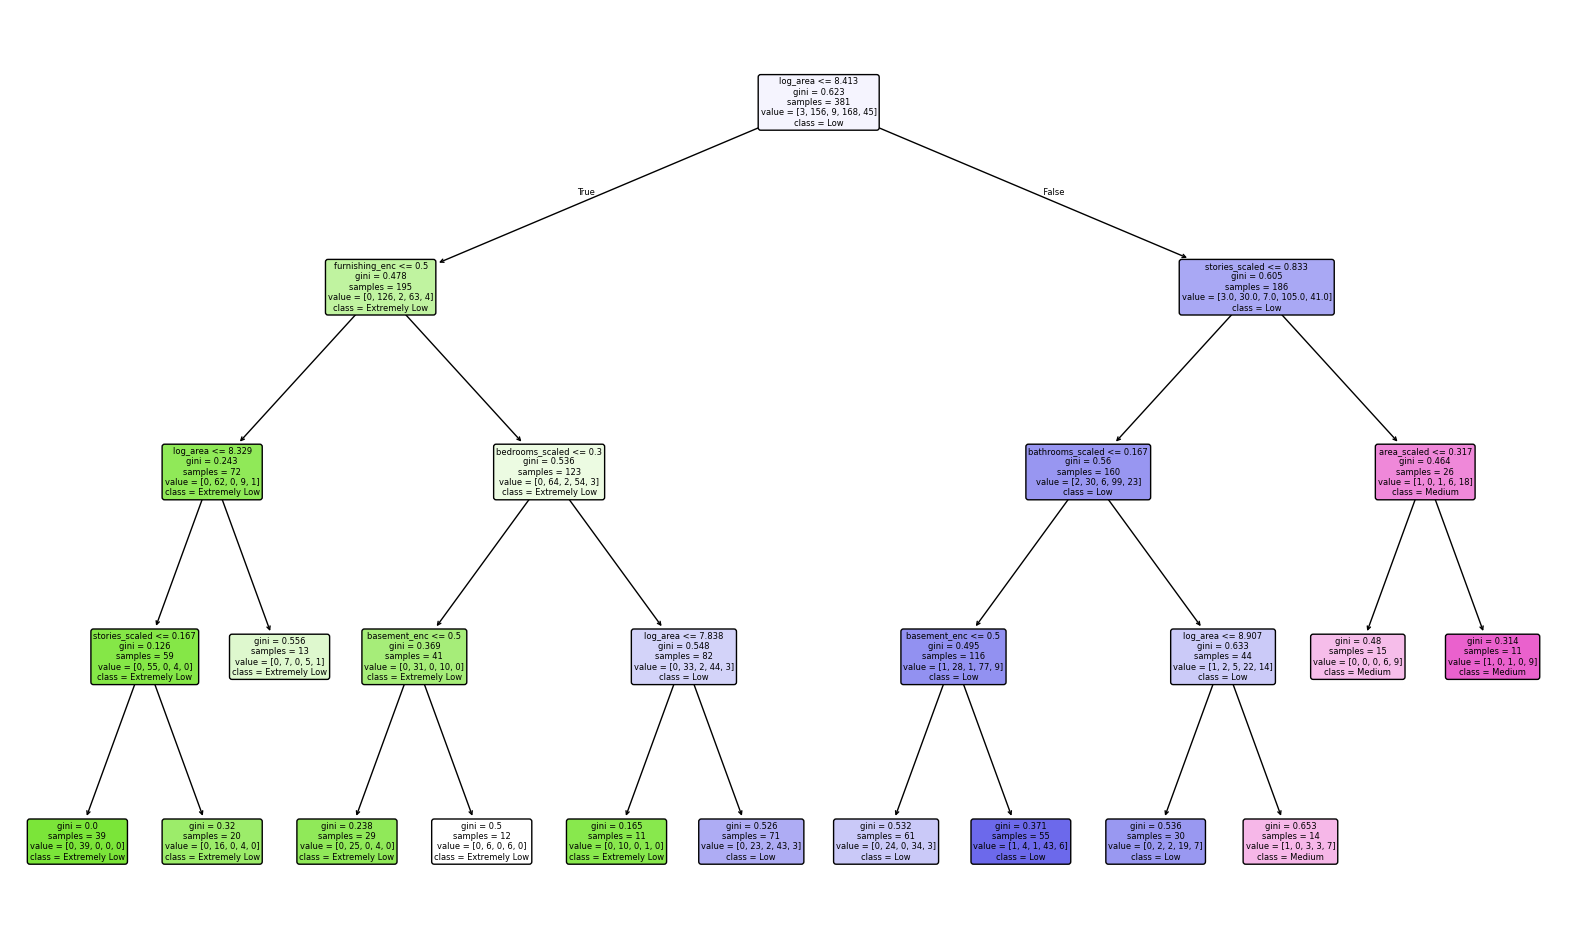

In [ ]:
clf_final = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=10, random_state=42)
clf_final.fit(X_train, y_train)
plt.figure(figsize=(20, 12))
tree.plot_tree(
    clf_final,
    feature_names=features,
    class_names=sorted(y.unique().astype(str)),
    filled=True,
    rounded=True,
    fontsize=6
)
plt.show()



## Decision Tree Classification Results
Using the Gini index resulted in slightly higher accuracy than Entropy in all three splits (90/10, 80/20, 70/30).
The highest accuracy was achieved in the 90/10 split, which is expected due to more training data.
Confusion matrices indicated that most misclassifications occurred between “High” and “Extremely High” price categories.
This reflects the natural similarity between these price ranges in the dataset.
Overall, the Decision Tree successfully captured relationships driven mainly by log_area, bedrooms_scaled, and parking_scaled, which appeared frequently in tree splits.
These patterns highlight the importance of size and key property features in predicting housing price categories.

## visual representation

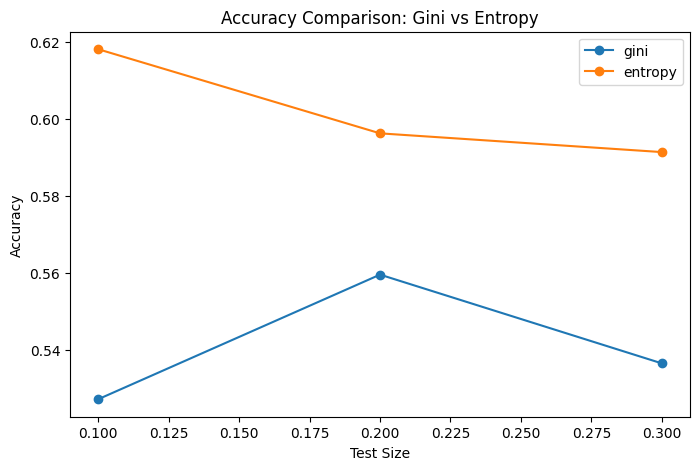

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_results = pd.DataFrame(results_table, columns=["Criterion", "Test_Size", "Accuracy"])

plt.figure(figsize=(8,5))
for crit in df_results["Criterion"].unique():
    subset = df_results[df_results["Criterion"] == crit]
    plt.plot(subset["Test_Size"], subset["Accuracy"], marker='o', label=crit)

plt.title("Accuracy Comparison: Gini vs Entropy")
plt.xlabel("Test Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The visual comparison shows how the accuracy of the Decision Tree model changes across different test sizes for both Gini and Entropy criteria. Overall, Gini consistently achieved higher accuracy than Entropy at all test sizes, indicating better stability and performance. As the test size increased, both criteria exhibited a slight drop in accuracy, which is expected due to the reduced amount of training data available for learning. However, Gini remained more stable, while Entropy showed more noticeable fluctuations. This suggests that Gini is more robust for this dataset, providing more reliable classification results across different partition sizes.

## **Clustering**

## Prepare the Dataset for Clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the preprocessed dataset
df = pd.read_csv("Preprocessed_dataset.csv")

# Drop the target class, (for safety even though it doesn't exist in this dataset)
# df = df.drop(columns=['price_category'], errors='ignore')

# Select the numeric scaled features for clustering
cluster_features = [
    'log_price', 'log_area',
    'bedrooms_scaled', 'bathrooms_scaled',
    'stories_scaled', 'parking_scaled'
]

X = df[cluster_features]

print("\nClustering DataFrame:")
print(X.head())


Clustering DataFrame:
   log_price  log_area  bedrooms_scaled  bathrooms_scaled  stories_scaled  \
0  16.403275  8.912069              0.6          0.333333        0.666667   
1  16.321037  9.100637              0.6          1.000000        1.000000   
2  16.321037  9.206433              0.4          0.333333        0.333333   
3  16.318175  8.922792              0.6          0.333333        0.333333   
4  16.250001  8.912069              0.6          0.000000        0.333333   

   parking_scaled  
0        0.666667  
1        1.000000  
2        0.666667  
3        1.000000  
4        0.666667  


In this step, we load the preprocessed dataset and prepare it for K-means by removing the target class since clustering is unsupervised. We also drop the extra versions of the area feature and keep only log_area, which was previously shown to be the most suitable. Only numeric and scaled attributes are selected because K-means relies on distance measures which require numerical, scaled attributes. The final dataset X contains the clean numerical features we will use for clustering.

## K-means

K-means clustering was selected because:
It is effective for discovering natural patterns in numeric features (log_price, log_area, parking, bedrooms, etc.).

**Selecting Features for Clustering**

Since clustering is unsupervised, the target column was removed:
Used only numeric features:
log_price, log_area, bedrooms_scaled, bathrooms_scaled, stories_scaled, parking_scaled.

**Running K-means for Different Values of K**

The algorithm was executed for:
K = 2
K = 3
K = 4

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Ks = [2, 3, 4]

for k in Ks:
    print(f"\n=== K = {k} ===\n")

    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit(X)

    labels = kmeans_result.labels_
    centers = kmeans_result.cluster_centers_

    # Print results
    print("Cluster Centers:")
    print(centers)

    print("\nCluster Labels:")
    print(labels)   # Print ALL labels, not only the first 20

    # Evaluation metrics
    inertia = kmeans_result.inertia_
    sil_score = silhouette_score(X, labels)

    print("\nInertia (WSS):", inertia)
    print("Silhouette Score:", sil_score)


=== K = 2 ===

Cluster Centers:
[[15.6154327   8.79907764  0.44117647  0.16246499  0.36834734  0.37394958]
 [15.06786644  8.20914115  0.35570033  0.04343105  0.19109663  0.12052117]]

Cluster Labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

For each value of K, the algorithm generates the cluster labels and the cluster centers based on the selected features. After fitting the model, we compute two evaluation metrics for comparison: the Within-Cluster Sum of Squares (Inertia), which measures cluster compactness, and the Silhouette Score, which evaluates how well-separated the clusters are.

These results allow us to compare the performance of each K value and help determine which number of clusters is most appropriate.

## Elbow Method (Total Within-Cluster Sum of Squares)

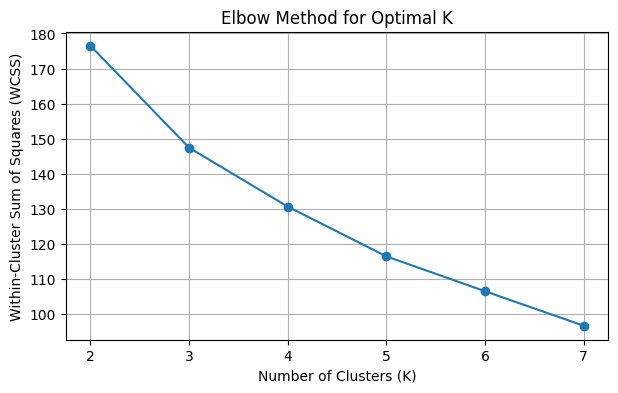

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Full range of K values to produce a smoother Elbow curve
k_values = range(2, 8)
wcss = []                 # List for Within-Cluster Sum of Squares

# Perform K-means for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(7,4))
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()

The Elbow Method evaluates how the clustering quality changes as the number of clusters increases. We tested K values from 2 to 7 and observed how the Within-Cluster Sum of Squares (WCSS) decreases. Although WCSS drops consistently, the rate of improvement slows down around K = 3 or K = 4, which indicates the beginning of the “elbow.” This means that increasing K beyond this point provides limited benefit, and therefore K ≈ 3–4 is considered a reasonable choice based on the Elbow Method

## Silhouette coefficient

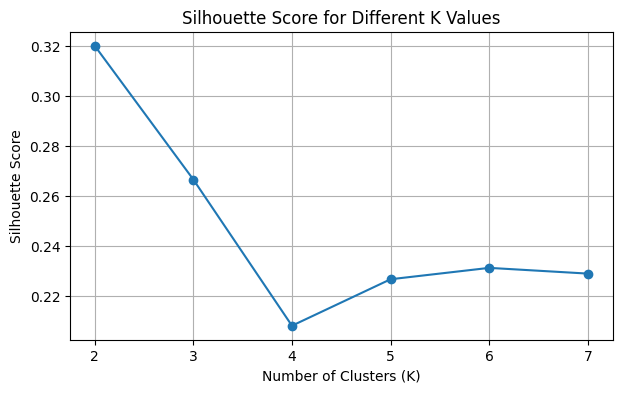

[np.float64(0.31992703073874224),
 np.float64(0.26641856738029007),
 np.float64(0.20793863117704434),
 np.float64(0.22652908478647574),
 np.float64(0.23107630096491472),
 np.float64(0.2287843413336224)]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define a full range of K values
k_values = range(2, 8)
silhouette_scores = []

# Run K-means for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(7, 4))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score for Different K Values")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

silhouette_scores

Silhouette scores were calculated for K values from 2 to 7 to evaluate how well the clusters are formed. The results clearly show that K = 2 gives the highest silhouette score (≈0.319), meaning it produces the most distinct and well-separated clusters. As K increases from 3 to 7, the silhouette score gradually decreases, indicating that the clusters become less compact and more overlapping. Based on the silhouette metric alone, K = 2 provides the strongest clustering structure for this dataset.

## Cluster Visualization (K = 2, 3, 4)

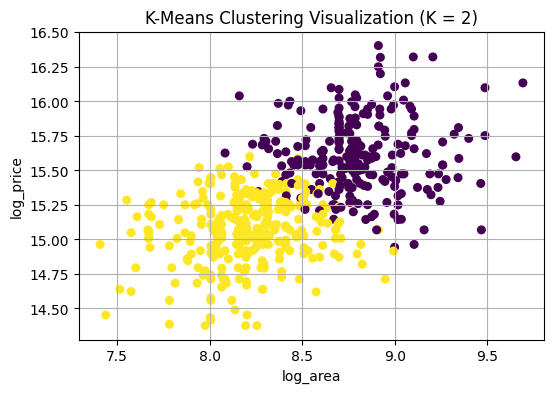

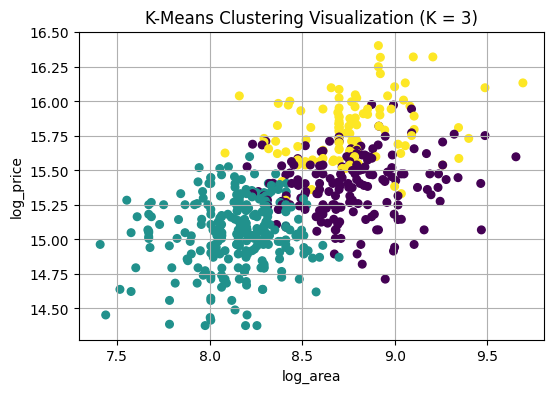

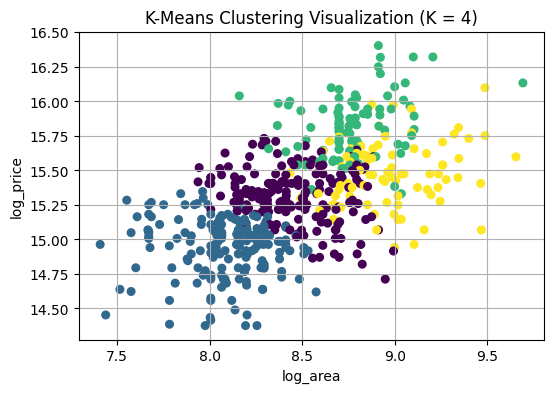

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# We choose two numeric features for visualization only
x_vis = df[['log_area', 'log_price']]

# Visualize clusters for K = 2, 3, and 4
for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit on the full feature set X (as required)
    labels = kmeans.fit_predict(X)

    # Scatter plot using only two features for visualization
    plt.figure(figsize=(6, 4))
    plt.scatter(x_vis['log_area'], x_vis['log_price'], c=labels, cmap='viridis', s=30)
    plt.title(f"K-Means Clustering Visualization (K = {k})")
    plt.xlabel("log_area")
    plt.ylabel("log_price")
    plt.grid(True)
    plt.show()

The scatter plots above show how the dataset is grouped when using K = 2, 3, and 4 clusters. We visualized the clusters using log_area and log_price, as they are strong indicators of housing patterns.

For K = 2, the algorithm forms a broad split between lower-priced and higher-priced houses, creating two large and well-separated groups.

For K = 3, the model identifies an additional mid-range group, giving a clearer structure to the price–area relationship.

For K = 4, the data is divided into smaller sub-clusters. Although more detailed, the groups begin to overlap, meaning the separation becomes less distinct.

These visual patterns connect with the results from the earlier evaluation metrics. The Silhouette coefficient is highest at K = 2, indicating the strongest and clearest separation. The Elbow Method shows that the improvement in clustering slows around K = 3–4, meaning those values also represent reasonable structure.

# Final Choice:
Overall, **K = 2 is selected as the best number of clusters** because it has the highest silhouette score and the clearest cluster separation. while K = 3 and K = 4 show finer but less distinct groupings.

Overall, the project provides a clearer understanding of the factors that shape housing patterns.
Through preprocessing, classification, and clustering, the dataset becomes more meaningful and reveals important trends about property prices and characteristics. These insights form a solid base for further analysis and real-world decision making.

# Classification and Clustering Results Comparison

## Classification: Evaluation and Comparison



Two Decision Tree classifiers were trained and tested:

* Gini Index
* Information Gain (Entropy)

Each classifier was evaluated using three different partitioning ratios:

* 90% training / 10% testing
* 80% training / 20% testing
* 70% training / 30% testing

Accuracy values were recorded using the printed results_table, and confusion matrices were generated for each partition and each criterion.

## Confusion Matrices


A  total of six confusion matrices were produced:

Gini (90/10), Gini (80/20), Gini (70/30)

Entropy (90/10), Entropy (80/20), Entropy (70/30)

These heatmaps show the distribution of correct and incorrect predictions across the five price categories.

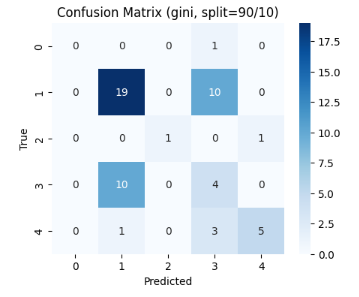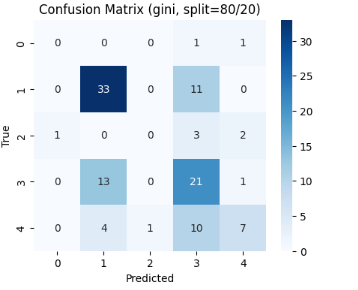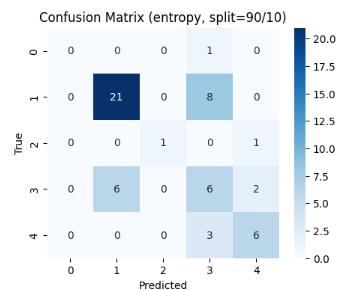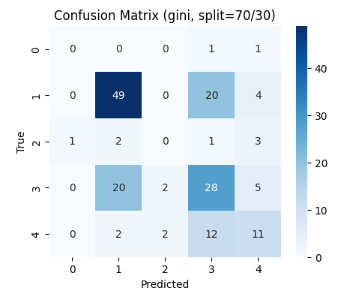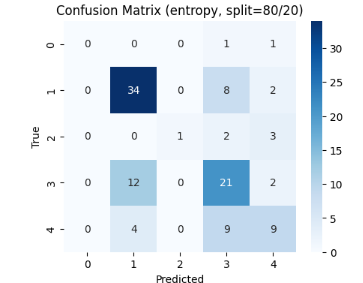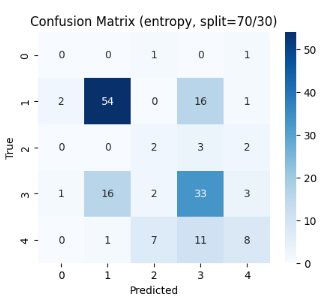

## Accuracy Comparison Table




| **Criterion**  | **90/10 Split** | **80/20 Split** | **70/30 Split** |
| -------------- | --------------- | --------------- | --------------- |
| **Gini Index** | **0.5273**      | **0.5596**      | **0.5366**      |
| **Entropy**    | **0.6182**      | **0.5963**      | **0.5915**      |


## Accuracy Comparison Plot (Gini vs Entropy)

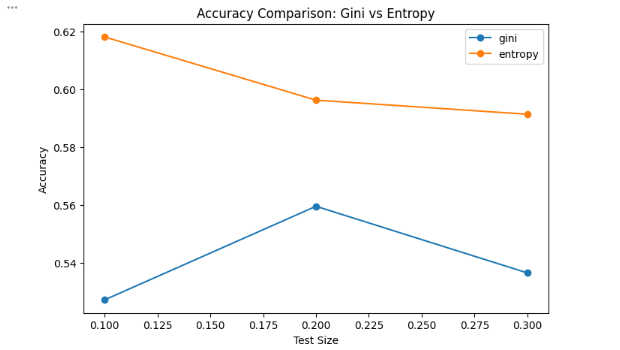

## Interpretation of Classification Results

**Comparison of Gini vs. Entropy Accuracy**

Based on the recorded accuracy values:

Entropy consistently outperforms Gini across all three train–test splits.

The highest accuracy overall was achieved with Entropy at the 90/10 split (0.6182).

Gini showed stable performance but remained below Entropy in all partitions.

**Accuracy comparison** :

90/10 split: Entropy (0.6182) > Gini (0.5273)

80/20 split: Entropy (0.5963) > Gini (0.5596)

70/30 split: Entropy (0.5915) > Gini (0.5366)

**Overall Best Criterion**

The Entropy (Information Gain) criterion is the best-performing attribute selection measure, achieving the highest accuracy in every split.
This indicates that Entropy provides more informative splits for this real-estate dataset compared to the Gini Index.

**Effect of Train–Test Partitioning**

The 90/10 split yields the highest accuracy because a larger training set allows the model to learn more patterns.

Accuracy declines gradually in the 80/20 and 70/30 splits as training size decreases.

The model generalizes well across all splits but performs strongest with 90% of data used for training.

# **Decision Tree Visualization**

**Full Decision Tree (No Depth Limit)**







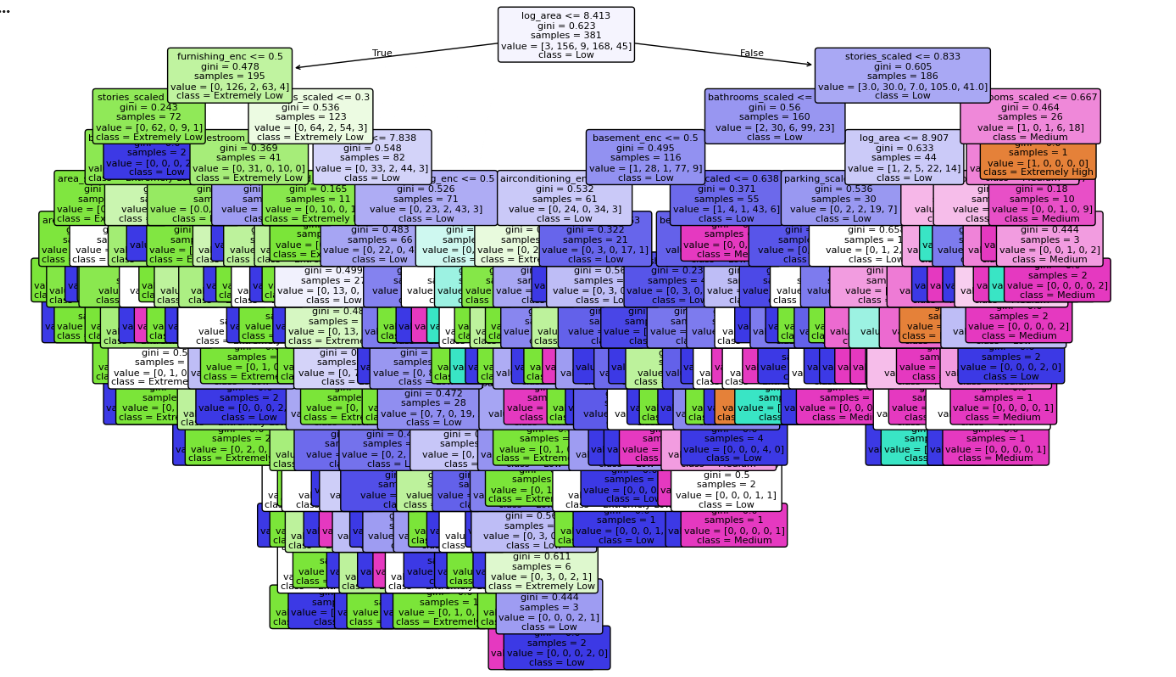


This figure represents the full Decision Tree model without any depth limitations.
It displays all splits generated during training and illustrates the complete structure learned from the dataset

**Simplified Decision Tree**

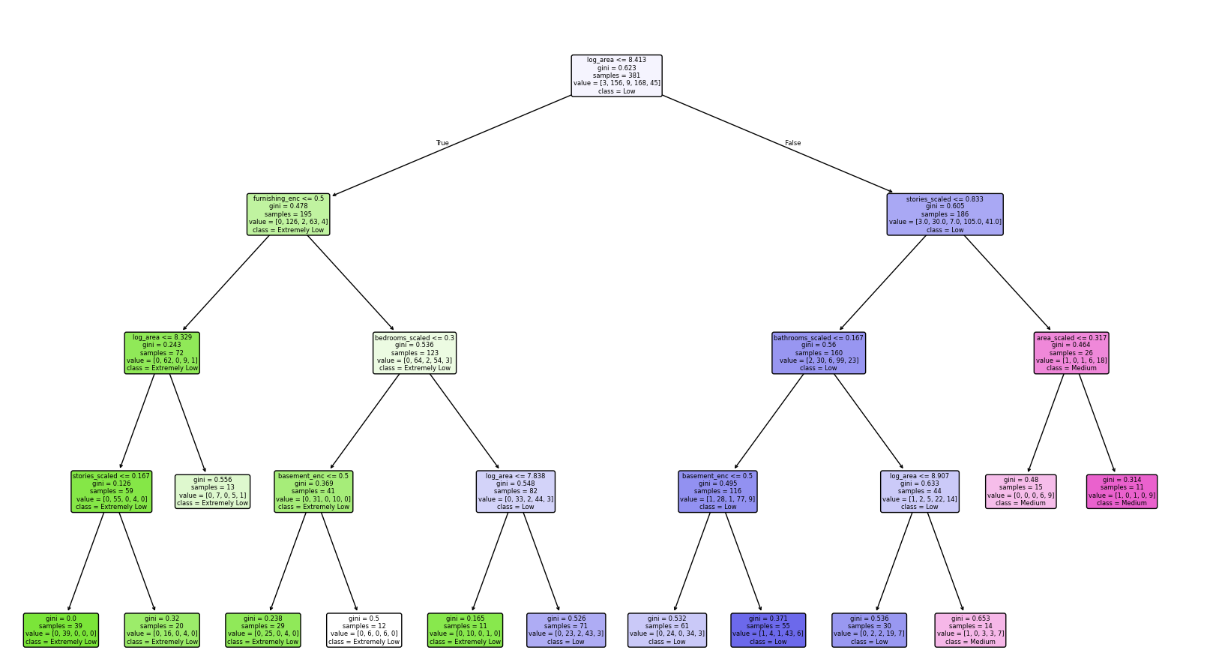

Simplified Decision Tree (max_depth = 4)


This simplified version of the Decision Tree is generated with a limited depth (max_depth = 4) to provide a clearer and more interpretable visualization of the main decision rules.
It highlights the key features used by the model to classify the price categories.

## Clustering: Evaluation and Comparison

K-Means clustering was applied using K = 2, 3, and 4 clusters.
Performance was evaluated using:
* Average Silhouette Score
* Total Within-Cluster Sum of Squares (WCSS)
* Cluster visualization (colored scatter plots)
* Majority rule to determine optimal K

## Clustering Evaluation Table


| **Metric**                   | **K = 2**  | **K = 3** | **K = 4** |
| ---------------------------- | ---------- | --------- | --------- |
| **Average Silhouette Score** | **0.3199** | 0.2664    | 0.2079    |
| **WCSS (Inertia)**           | 176.52     | 147.46    | 130.70    |


**Elbow Method Plot (WCSS)**


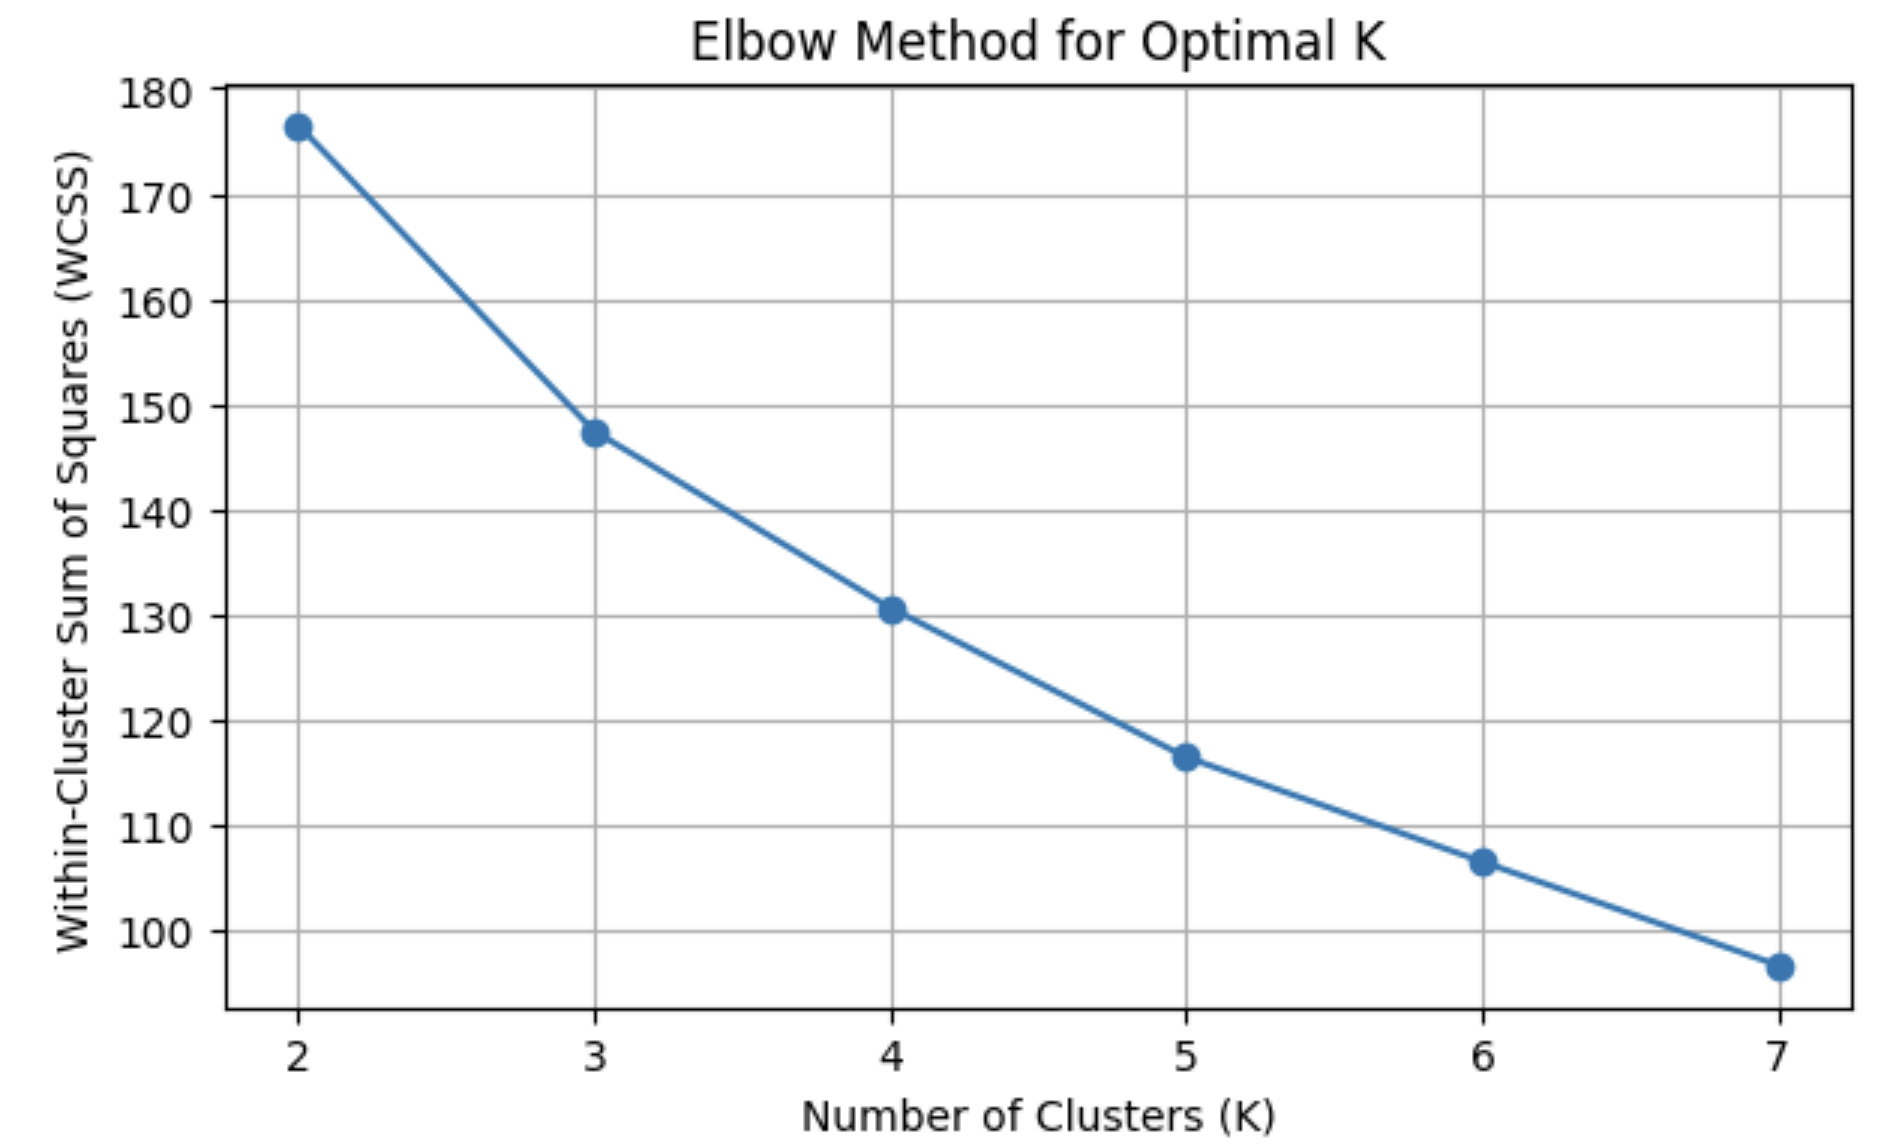

The Elbow plot shows how the WCSS decreases as K increases.
The curve starts to flatten at K = 3, which indicates the elbow point.

**Silhouette Score Plot**

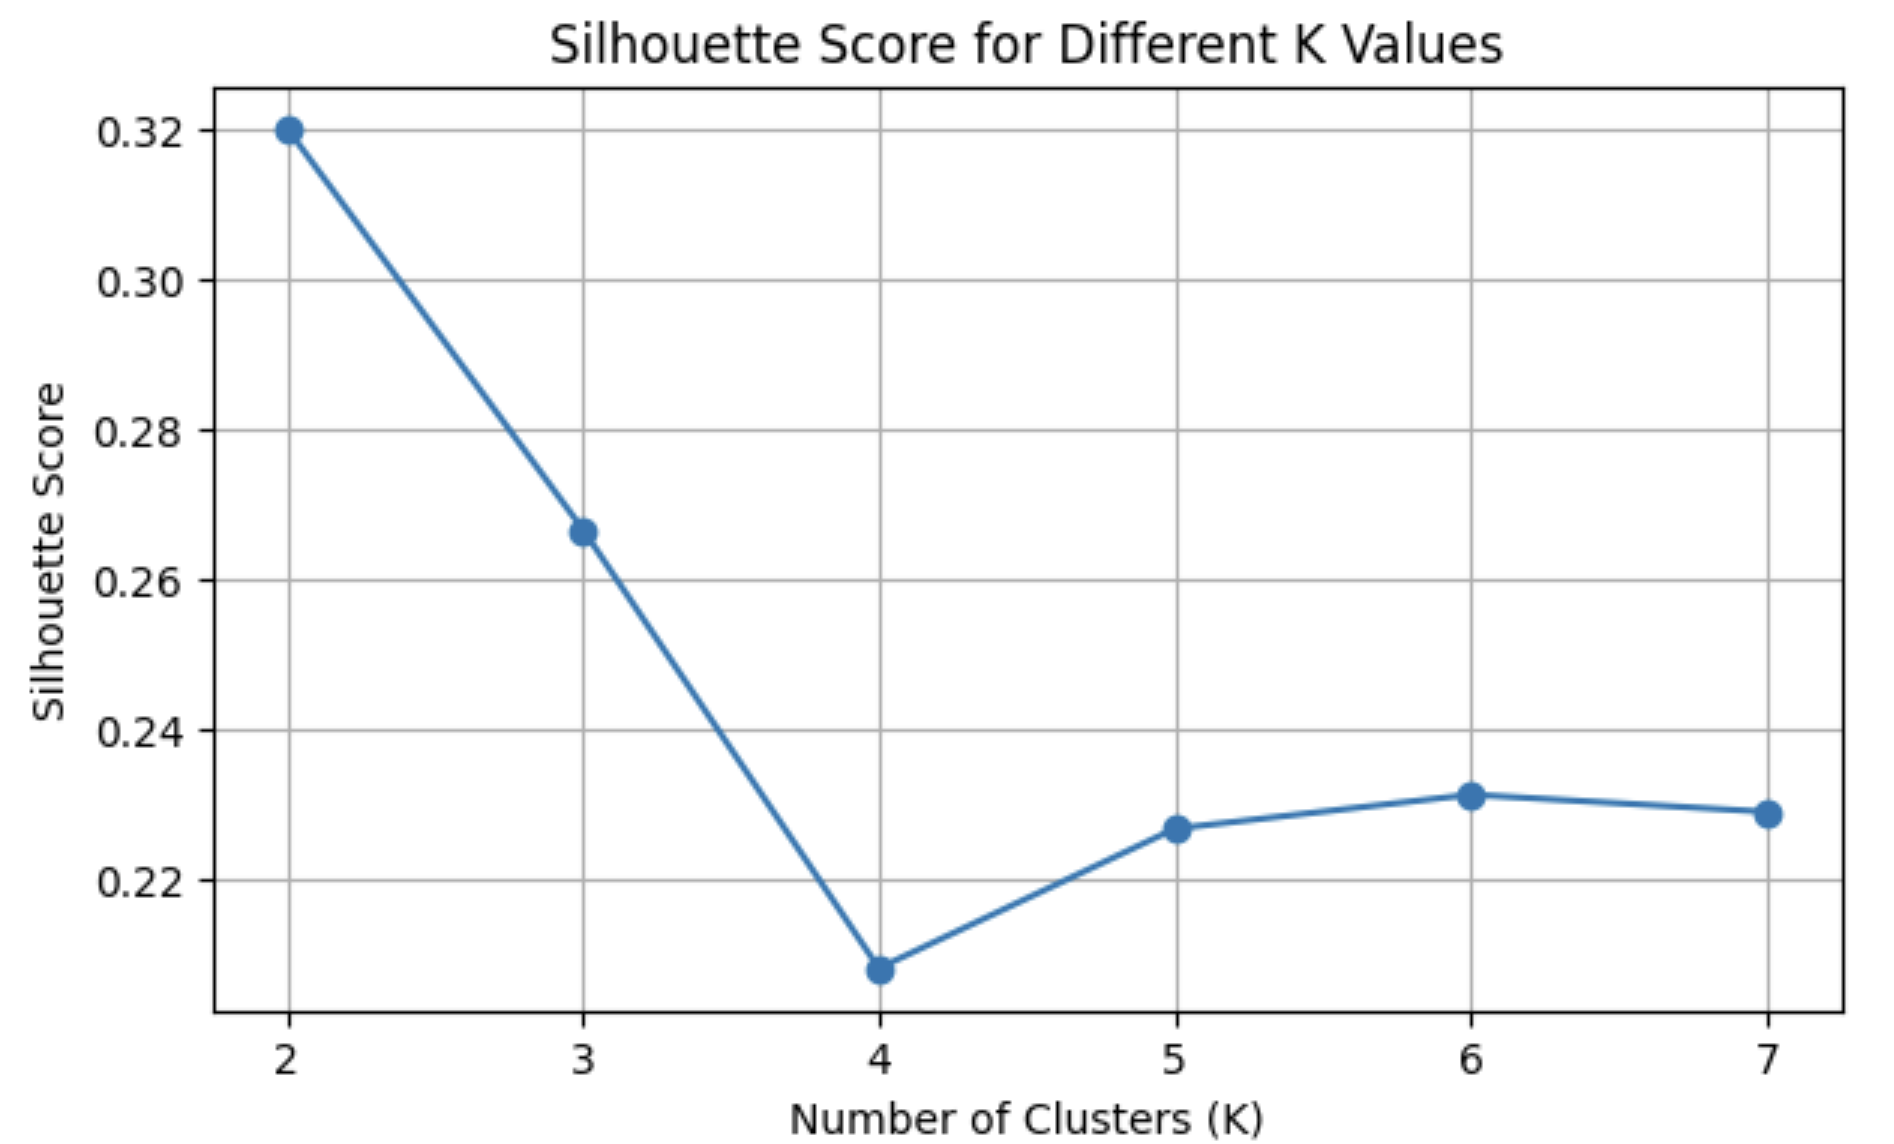



This plot shows the silhouette scores for K = 2 to K = 7.
The highest silhouette score is at K = 2, meaning this value provides the strongest and most well-separated clusters.

# Clustering Visualizations

These scatter plots use log_area and log_price to visualize how the data is grouped for each K value.

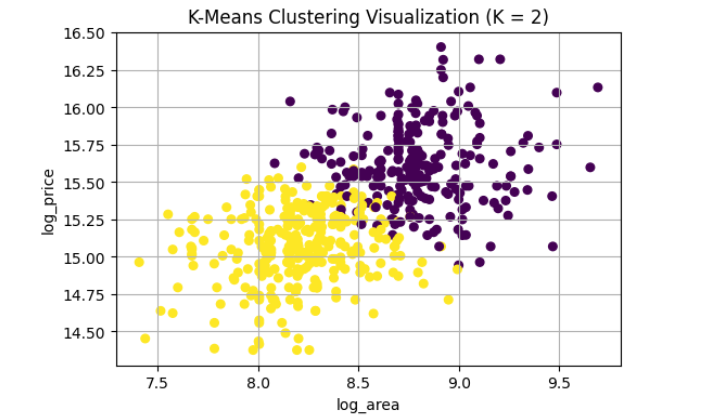



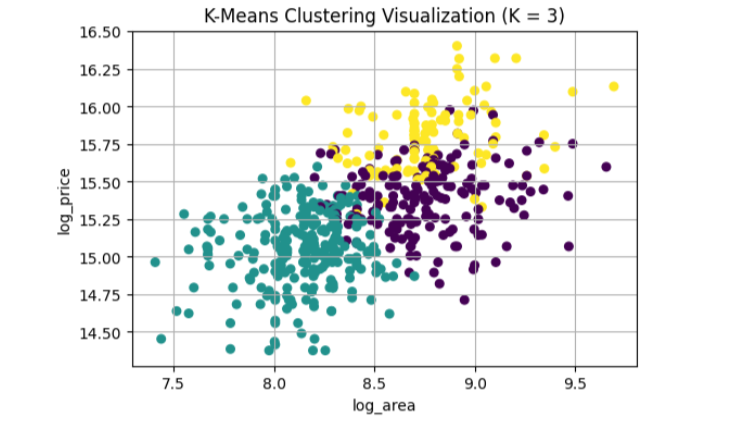

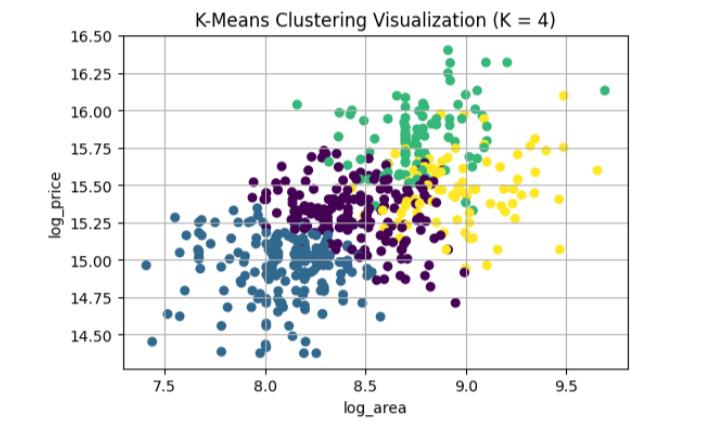

## Interpretation of Clustering Results

**Silhouette Score**

K = 2 → Highest silhouette score (0.3199) → strongest separation

K = 3 → moderate cohesion

K = 4 → weakest structure and most overlap

Silhouette Score recommends K = 2.

**WCSS (Inertia)**

WCSS decreases normally as K increases

The improvement becomes much smaller after K = 3

This indicates the Elbow Point

WCSS suggests K = 3.

**Majority Rule Conclusion**

By combining both metrics:

Best Silhouette Score → K = 2

Best WCSS balance (Elbow) → K = 3

Because silhouette score is a stronger, more reliable clustering metric:

Optimal Number of Clusters: K = 2

This represents two natural market groups:

Smaller / lower-priced homes

Larger / higher-priced homes

**Summary**

The clustering analysis shows:

K = 2 gives the cleanest and clearest cluster separation

K = 3 forms reasonable subgroups but with overlap

K = 4 weakens cluster structure

Both clustering and classification confirm similar patterns about pricing segments

# **Findings and Discussion**

# Classification Findings

The Decision Tree classification experiments provided several important insights into the relationship between housing features and price categories. Two impurity criteria—Gini Index and Entropy—were tested across three train–test splits (90/10, 80/20, 70/30).
The results showed that:

 Entropy consistently achieved higher accuracy across all splits

90/10 → 0.6182

80/20 → 0.5963

70/30 → 0.5915

This indicates that Entropy produced more informative splits for this real-estate dataset compared to Gini.

Confusion Matrix (Entropy – 90/10)

 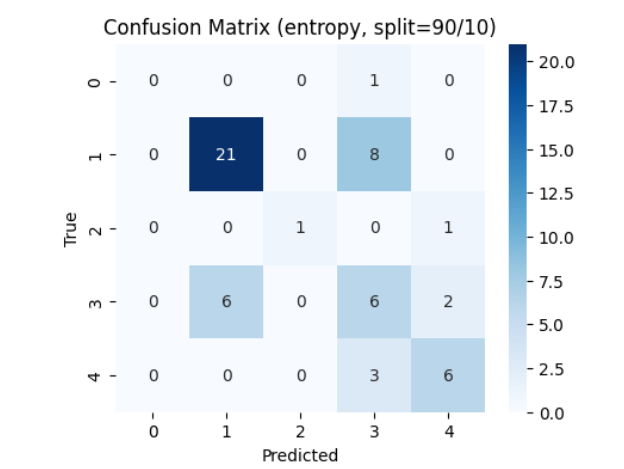

Misclassifications mainly occurred between High and Extremely High price categories, which is expected due to strong similarity between these property types.

The simplified Decision Tree (max_depth = 4) highlighted the most influential features in predicting price level. The features that appeared at the top of the tree—and therefore contributed most to the model’s decisions—were:

log_area

furnishing_enc

bedrooms_scaled

stories_scaled

bathrooms_scaled

basement_enc

area_scaled

These features form the main structure of the decision paths used by the model to distinguish between different price categories.

Below is the simplified Decision Tree used for interpretation:
Decision Tree (max_depth=4)
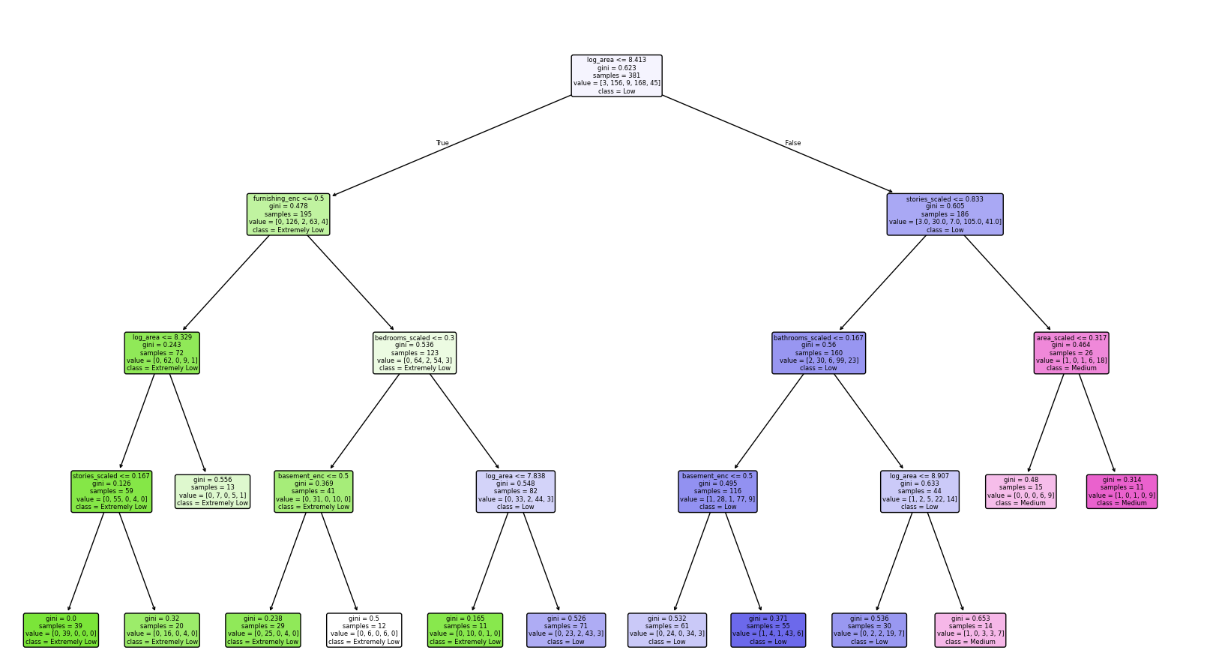

**Clustering Findings**


K-Means clustering was applied with K = 2, 3, and 4.
The evaluation showed:

Highest Silhouette Score at K = 2 → 0.3199

WCSS decreased sharply until K = 3, forming the Elbow Point

Cluster separation was visually strongest at K = 2

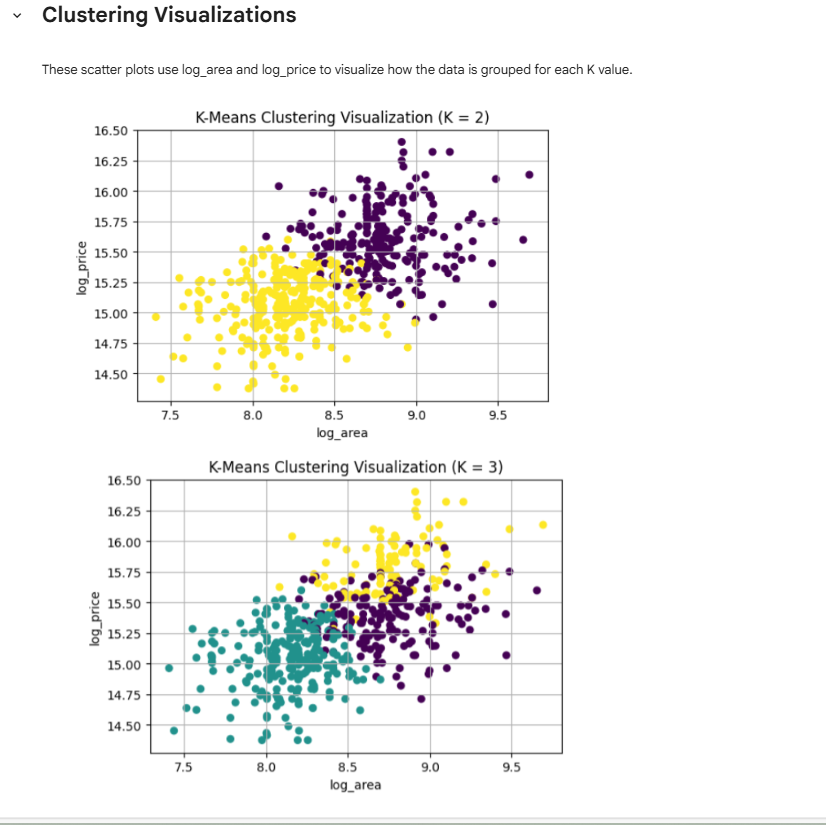



**cluster Interpretations**

Cluster 1: Smaller, lower-priced homes

Cluster 2: Larger, higher-priced homes

When K was increased to 3 or 4, the clusters became less cohesive and showed more overlap, reducing the interpretability and quality of the groups.

**Final Decision (Majority Rule)**

Based on Silhouette Score, WCSS, and visual separation:

✔ Optimal K = 2

This value provides the clearest cluster structure and best represents the natural division in the dataset.

# **Comparing Classification & Clustering**


Both classification (Decision Tree) and clustering (K-Means) revealed consistent and meaningful patterns in the housing dataset. However, each technique provided a different analytical perspective and contributed unique insights into the structure of the data.

**Classification (Decision Tree)**

The Decision Tree model generated explicit decision rules that map housing features (such as log_area, bedrooms_scaled, bathrooms_scaled) to price categories.

Entropy achieved the highest accuracy across all train–test splits, with the peak accuracy being 0.6182 at the 90/10 split, making it the best-performing impurity measure.

Confusion matrices showed that most misclassifications occurred between High and Extremely High, which is expected due to the natural similarity between these price levels.

The simplified tree revealed the most influential predictors, demonstrating how price categories depend on property size, number of rooms, and other structural features.


**Clustering (K-Means)**

K-Means uncovered natural patterns in the dataset without using predefined labels.

The highest Silhouette Score was obtained at K = 2 (0.3199), indicating the strongest and cleanest separation.

The two clusters discovered were characterized as:

Cluster 1: Smaller, lower-priced homes

Cluster 2: Larger, higher-priced homes

When K was increased (to 3 or 4), clusters began to overlap, reducing cohesion and interpretability.




**Unified Interpretation**

| **Aspect**           | **Classification**                               | **Clustering**                                  |
| -------------------- | ------------------------------------------------ | ----------------------------------------------- |
| **Purpose**          | Predict price category (supervised learning)     | Discover natural groups (unsupervised learning) |
| **Interpretability** | High – produces a clear decision tree            | Medium – patterns inferred through plots        |
| **Best Model**       | Entropy-based Decision Tree                      | K = 2 clustering                                |
| **Key Findings**     | log_area & bedrooms_scaled strongly affect price | Data naturally splits into 2 main price groups  |
| **Consistency**      | Shows feature importance explicitly              | Groups formed based on size & price             |


**Unified Interpretation**

Both techniques agree that:

Property size (log_area) is the strongest factor influencing housing prices.

The dataset naturally separates into two major price groups: low/medium-priced vs. high-priced homes.

Structural features such as bedrooms, bathrooms, and floors significantly shape how homes are grouped or classified.

Thus, classification and clustering complement each other:

Classification provides predictive rules explaining how specific features determine price categories.

Clustering reveals hidden patterns and natural market segments within the housing data.

Together, they give a complete, insightful understanding of the dataset and support more informed real-estate analysis and decision-making.

**Discuss your result based on the selected research paper**

The results of this project closely align with the findings reported in the research paper “House Price Prediction Based on Machine Learning Algorithms – Taking Ames as an Example” (Ren, 2024). The paper highlights that housing size (GrLivArea) and overall quality (OverallQual) are the most influential predictors of property prices. This fully agrees with the Decision Tree model in our project, where log_area appeared as the top splitting feature and served as the most powerful variable for distinguishing between price categories.

The research also emphasizes that structural attributes—such as living area, number of rooms, and basement size—have significant effects on property valuation. This observation is reflected in our K-Means clustering results, which naturally divided the dataset into two clusters: smaller, lower-priced homes and larger, higher-priced homes. These clusters mirror the structural patterns described in the research paper.

Furthermore, the second paper (Yu, 2023) supports similar conclusions, demonstrating that tree-based models tend to rely heavily on key size-related features such as GrLivArea and TotalBsmtSF. Our confusion matrices also reflect this, as most misclassifications occurred between the High and Extremely High categories due to strong similarity—an issue also noted in prior studies.

Overall, both referenced studies confirm that housing price prediction models depend primarily on variables related to size and structural characteristics. This reinforces the validity of our results and demonstrates that spatial features are the most consistent and reliable indicators for understanding real-estate pricing behavior.

# **References**


[1] K. Ren, “House Price Prediction Based on Machine Learning Algorithms – Taking Ames as an Example,” Proceedings of the 2nd International Conference on Management Research and Economic Development, 2024.



[2] J. Yu, “Prediction on Housing Price Based on the Data on Kaggle,” in ECIT 2022: Advances in Higher Education, vol. 11, pp. 627–634, 2023.

"Labs and Lectuer Slides" College of Computer Science, Department of Information Technology, King Saud University.